In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor
import xgboost as xgb
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [36]:
df = pd.read_csv("klar_for_oppgave_5.csv",index_col=0)
X = df.drop(columns=["Close"])
y = df["Close"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,PLS_Component_1,PLS_Component_2,PLS_Component_3,PLS_Component_4,PLS_Component_5,PLS_Component_8,PLS_Component_9,PLS_Component_10,PLS_Component_12
2323,4.889292,-2.977292,1.944830,-0.947995,-0.026429,0.597677,-0.545085,-0.565256,0.383897
1042,-6.348190,4.731218,-1.824143,0.622389,-0.160912,-0.335043,0.348016,0.202034,-0.181195
2820,7.246649,-4.794195,2.807452,-0.870533,0.757662,0.276345,-0.406990,-0.128273,0.001728
2759,6.128037,-4.198443,2.182937,-0.700179,0.606949,0.163217,-0.264682,-0.106247,-0.096071
1100,-5.479450,3.571300,-2.226312,0.666937,-0.549482,-0.369109,0.372466,0.223085,-0.207036


In [12]:
y_train.head()

2323    0.640
1042    0.140
2820    0.760
2759    0.725
1100    0.170
Name: Close, dtype: float64

In [ ]:
# Step 3: Initialize a base model (e.g., DecisionTreeRegressor)
base_model = DecisionTreeRegressor(random_state=42)

# Step 4: Initialize the BaggingRegressor using the base model
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=50, random_state=42)

# Step 5: Train the BaggingRegressor model
bagging_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Step 7: Evaluate the performance using Mean Squared Error (MSE)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R-squared (R2): {r2:.5f}")


Model Evaluation:
Mean Squared Error (MSE): 0.00012
Root Mean Squared Error (RMSE): 0.01101
Mean Absolute Error (MAE): 0.00792
R-squared (R2): 0.99756


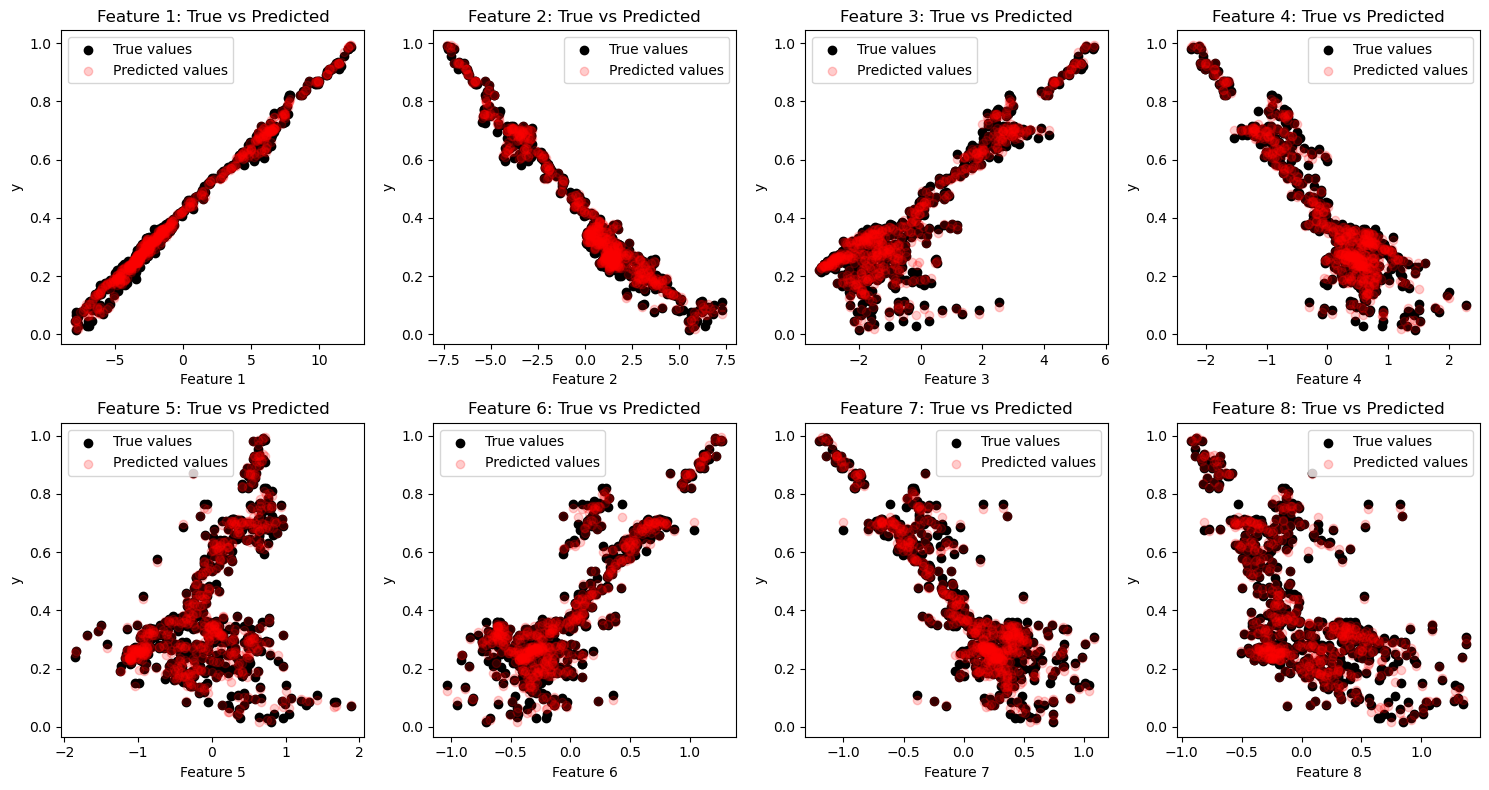

In [33]:
# Step 8: Create subplots to visualize the predictions for each feature in X_test
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # 2 rows, 4 columns (8 plots total)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot for each feature in X_test
for i in range(8):
    ax = axes[i]
    ax.scatter(X_test.iloc[:, i], y_test, color='black', label='True values')  # True values (y_test)
    ax.scatter(X_test.iloc[:, i], y_pred, color='red', label='Predicted values', alpha=0.2)  # Predicted values (y_pred)
    
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('y')
    ax.set_title(f'Feature {i+1}: True vs Predicted')
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [39]:
# Step 3: Initialize a base model (e.g., DecisionTreeRegressor)
base_model = DecisionTreeRegressor(random_state=42)

# Step 4: Initialize the BaggingRegressor using the base model
bagging_model = BaggingRegressor(estimator=base_model, random_state=42)

# Step 5: Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the ensemble
    'max_samples': uniform(0.1, 1.0),  # Proportion of samples to use for each base estimator
    'max_features': uniform(0.1, 1.0),  # Proportion of features to use for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement
    'oob_score': [True, False],  # Whether to use out-of-bag samples to estimate the generalization error
}

# Step 6: Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random configurations to try
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Step 7: Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model from the RandomizedSearchCV
best_bagging_model = random_search.best_estimator_

# Step 8: Make predictions on the test set using the best model
y_pred = best_bagging_model.predict(X_test)

# Step 9: Evaluate the performance using Mean Squared Error (MSE), RMSE, MAE, and R2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nBest Hyperparameters from RandomizedSearchCV:")
print(random_search.best_params_)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R-squared (R2): {r2:.5f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/thomas/miniconda3/envs/.machine_learning/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/thomas/miniconda3/envs/.machine_learning/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/thomas/miniconda3/envs/.machine_learning/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/thomas/miniconda3/envs/.machine_learning/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reli


Best Hyperparameters from RandomizedSearchCV:
{'bootstrap': True, 'max_features': 0.81134195274865, 'max_samples': 0.8901755405312056, 'n_estimators': 132, 'oob_score': True}

Model Evaluation:
Mean Squared Error (MSE): 0.00012
Root Mean Squared Error (RMSE): 0.01099
Mean Absolute Error (MAE): 0.00800
R-squared (R2): 0.99757


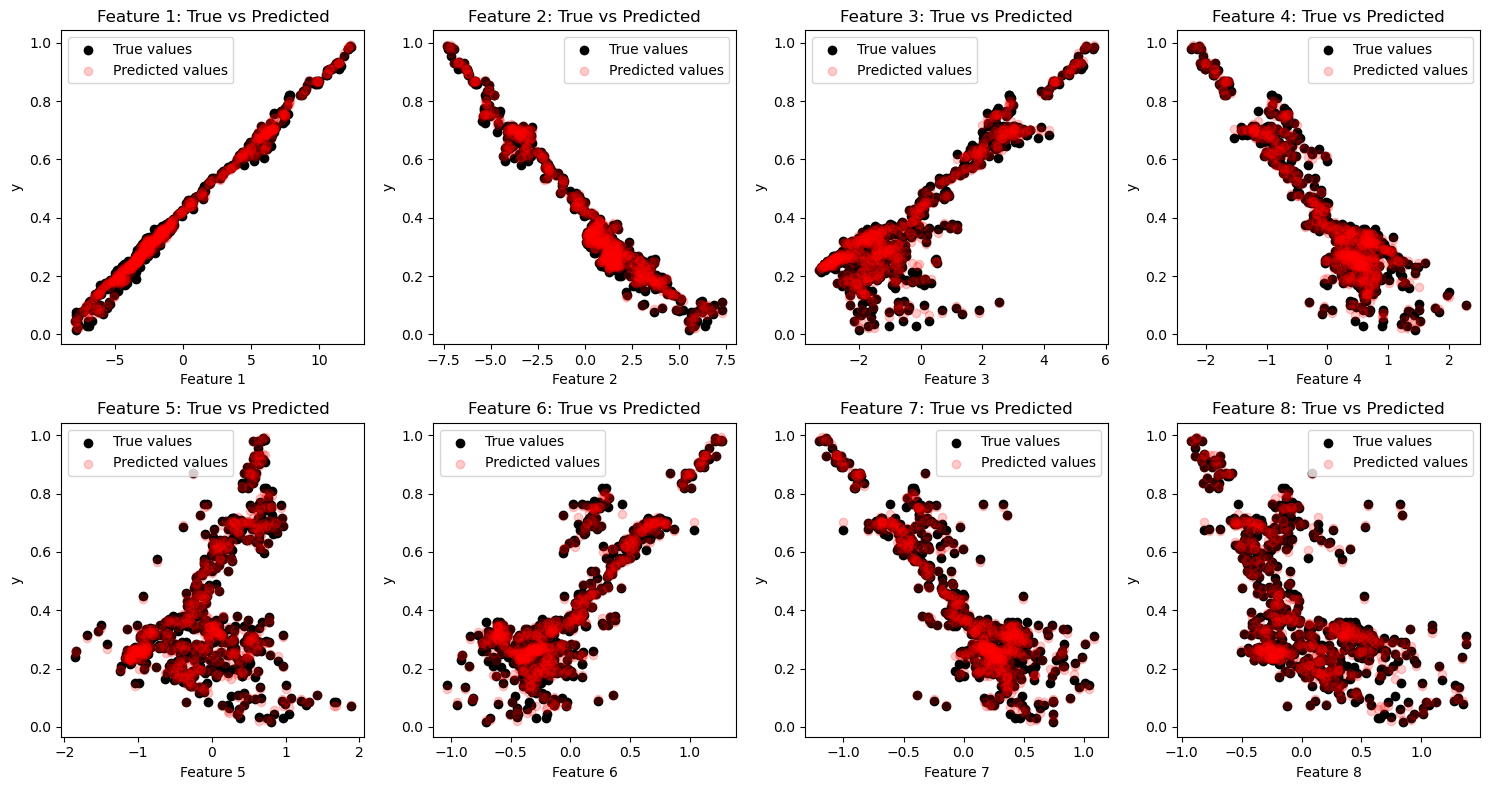

In [40]:
# Step 10: Create subplots to visualize the predictions for each feature in X_test
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # 2 rows, 4 columns (8 plots total)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot for each feature in X_test
for i in range(8):
    ax = axes[i]
    ax.scatter(X_test.iloc[:, i], y_test, color='black', label='True values')  # True values (y_test)
    ax.scatter(X_test.iloc[:, i], y_pred, color='red', label='Predicted values', alpha=0.2)  # Predicted values (y_pred)
    
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('y')
    ax.set_title(f'Feature {i+1}: True vs Predicted')
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
